In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.utils import make_grid
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import madgrad
import torchsummary

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cpu = torch.device('cpu')

In [38]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.n_features=128
        self.conv = nn.Sequential(
            nn.ConvTranspose2d(128, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False), nn.Tanh())
        
    def forward(self, x):
        x = self.conv(x)
        return x
    
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid())
        
    def forward(self, x):
        x = self.conv(x)
        return x.view(-1, 1)
    
gen = Generator().to(device)
dis = Discriminator().to(device)

In [39]:
gen.load_state_dict(torch.load('./models/generator.pth'))
dis.load_state_dict(torch.load('./models/discriminator.pth'))

<All keys matched successfully>

In [40]:
def noise(n, n_features=128):
    data = torch.randn(n, n_features, 1, 1)
    return data.to(device)

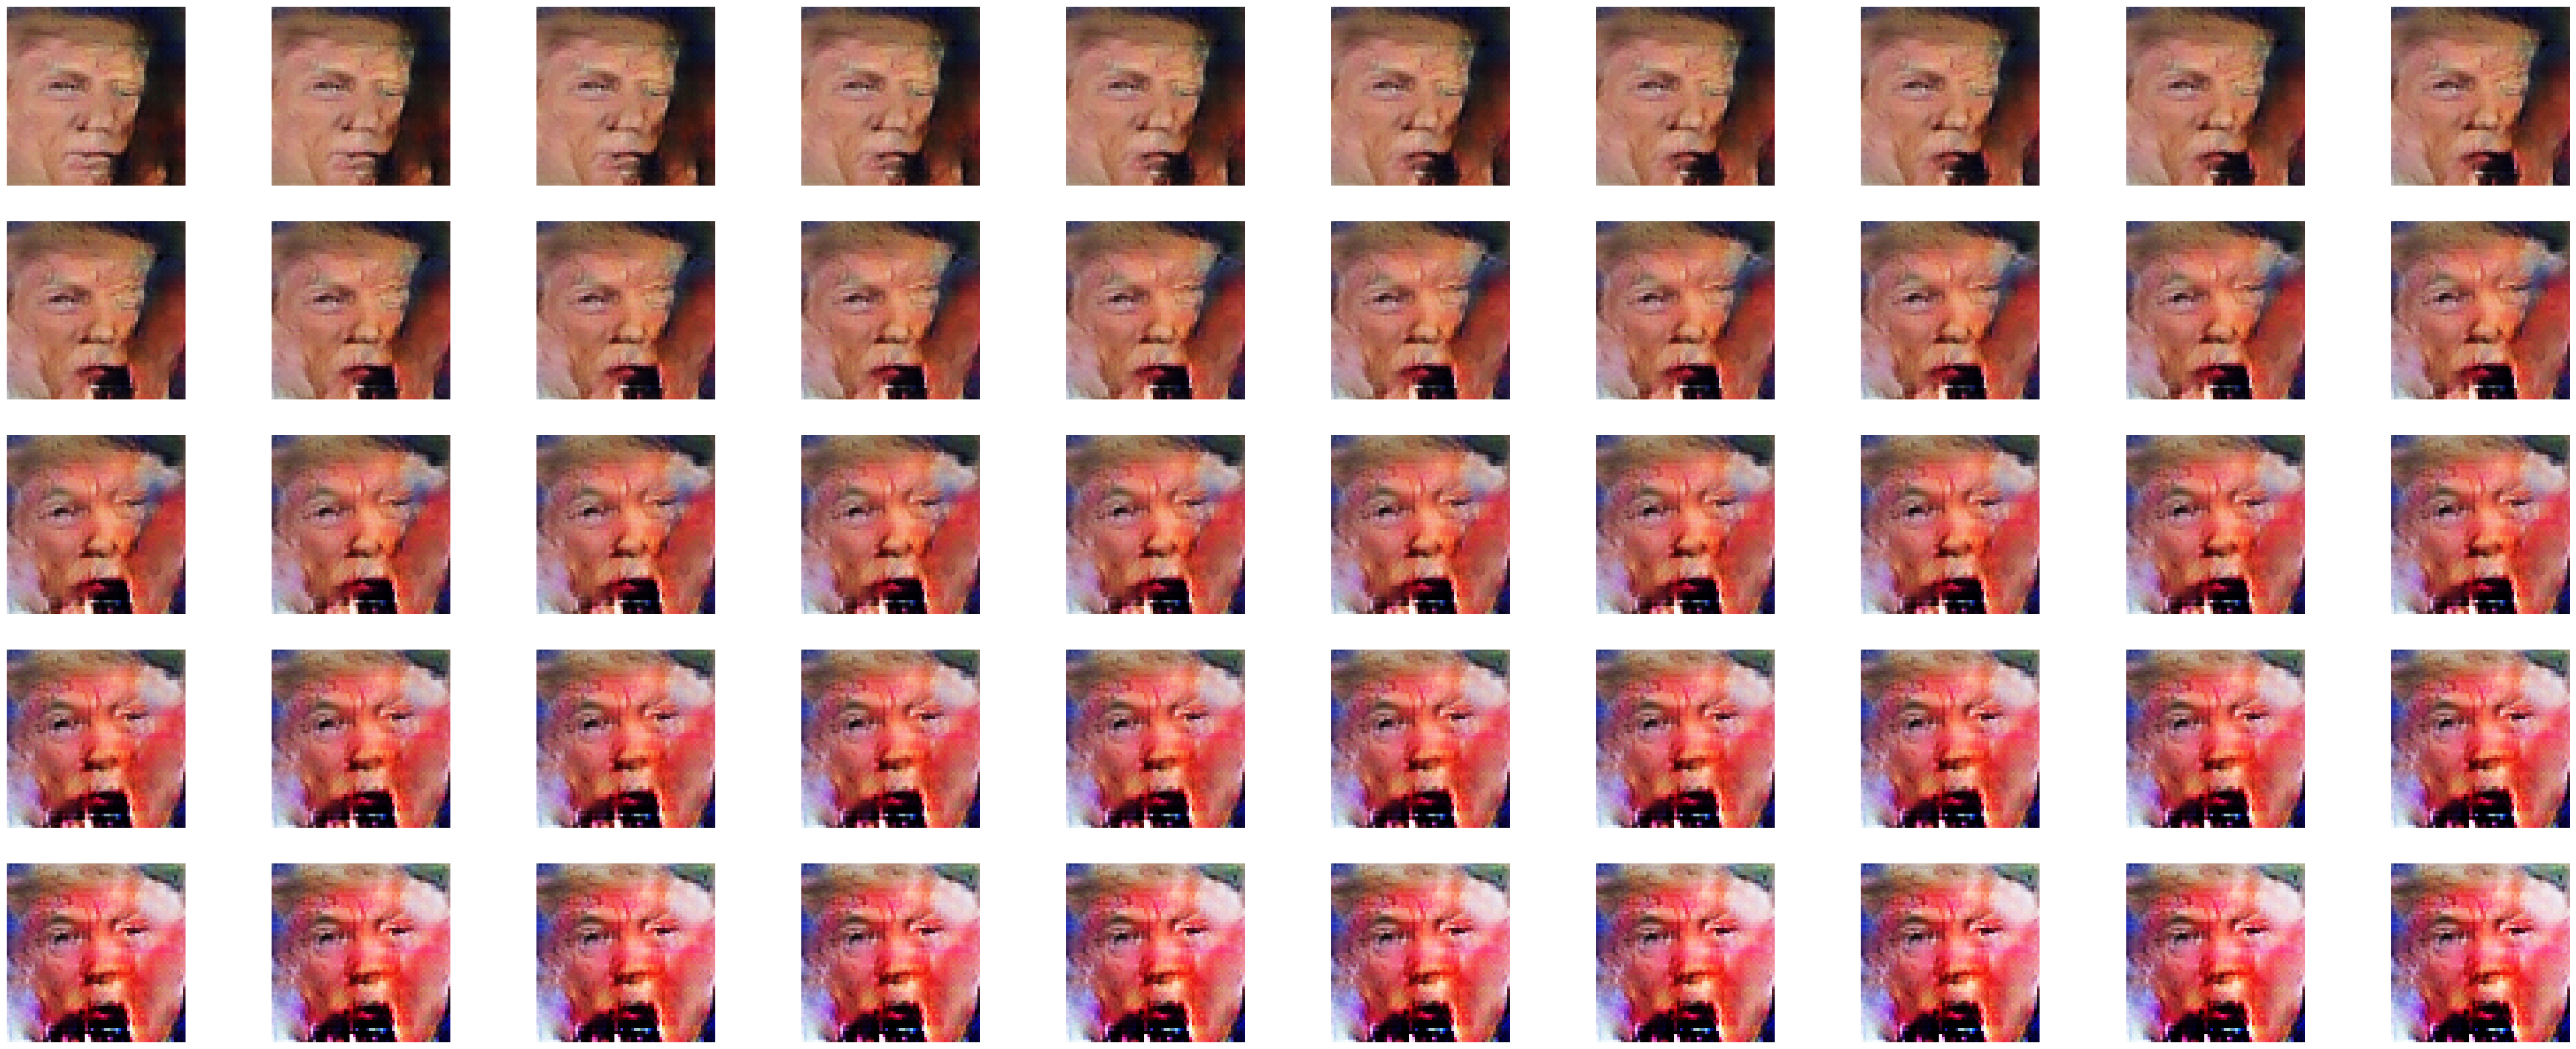

In [81]:
plt.figure(figsize=(50, 20))
n = noise(1)

gen.eval()
with torch.no_grad():
    for i in range(5):
        for j in range(10):
            plt.subplot(5,10,((i)*10)+j+1)
            plt.imshow((gen.forward(n)[0].cpu().permute(1,2,0)+1)/2)
            plt.axis(False)
            n += 0.07